# Dataset
United Nations data on immigration to Canada <br><br>
Source: https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp

## 1. Read Data into Pandas DataFrame

In [1]:
from __future__ import print_function  # adds compatibility to Python 2
import numpy as np  # useful for scientific computing
import pandas as pd  # primary data structure library

In [2]:
# install xlrd, which helps extracting data from Excel files
!pip install xlrd

print("xlrd installed")

xlrd installed


In [3]:
df_can = pd.read_excel(
    "Canada.xlsx",
    sheet_name = "Canada by Citizenship",
    skiprows = range(20),
    skipfooter = 2)
# Skipping the first 20 rows because of the header in the Excel file

In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


## 2. Line Plots
A series of data points called "markers" connected by a straight line segment

In [5]:
# Process the DataFrame so that the Country Name becomes the Name of each Row
df_can.set_index("OdName", inplace = True)

# Rename new index column
#df_can.rename(columns = {"OdName":"Country"}, inplace = True) for ONLY columns
df_can.index.names = ['Country']

df_can.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
# Check the Data Types of all columns
df_can.dtypes

Type        object
Coverage    object
AREA         int64
AreaName    object
REG          int64
RegName     object
DEV          int64
DevName     object
1980         int64
1981         int64
1982         int64
1983         int64
1984         int64
1985         int64
1986         int64
1987         int64
1988         int64
1989         int64
1990         int64
1991         int64
1992         int64
1993         int64
1994         int64
1995         int64
1996         int64
1997         int64
1998         int64
1999         int64
2000         int64
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
dtype: object

In [7]:
# Create a list with columns which have numbers to not include in the SUM
cols_to_drop = ['AREA','REG', 'DEV']

# Add an extra column for the SUM of immigration flow in time
df_can['Total'] = df_can.drop(cols_to_drop, axis = 1).sum(axis = 1, numeric_only = True, skipna = True)

df_can.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,15


In [8]:
df_can.dtypes

Type        object
Coverage    object
AREA         int64
AreaName    object
REG          int64
RegName     object
DEV          int64
DevName     object
1980         int64
1981         int64
1982         int64
1983         int64
1984         int64
1985         int64
1986         int64
1987         int64
1988         int64
1989         int64
1990         int64
1991         int64
1992         int64
1993         int64
1994         int64
1995         int64
1996         int64
1997         int64
1998         int64
1999         int64
2000         int64
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
Total        int64
dtype: object

In [9]:
df_can.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,15


In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
df_canada = df_can.copy()

In [12]:
df_canada.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,15


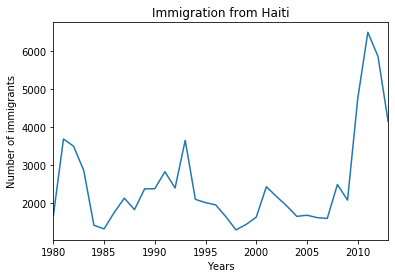

In [13]:
years = list(map(int, range(1980, 2014)))

df_canada.loc["Haiti", years].plot(kind = "line")
plt.title("Immigration from Haiti")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")

plt.show()

# 3. Area Plot
Good for --> Comparing two or more quanitites

In [14]:
df_canada.sort_values(["Total"], ascending = False, axis = 0, inplace = True)

In [15]:
df_canada.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,22045,24796,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,5921,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,978,972,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [16]:
years = list(map(int, range(1980, 2014)))

df_top5 = df_canada.head()
df_top5 = df_top5[years].transpose()

In [17]:
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

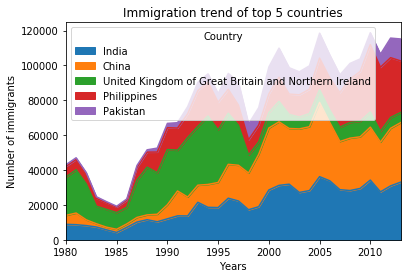

In [19]:
df_top5.plot(kind = "area")

plt.title("Immigration trend of top 5 countries")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")

plt.show()

# 4. Histograms
Frequency distribution of a numeric dataset

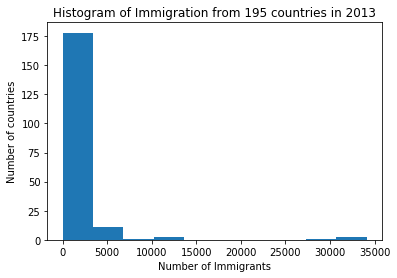

In [20]:
df_canada[2013].plot(kind = "hist")

plt.title("Histogram of Immigration from 195 countries in 2013")
plt.ylabel("Number of countries")
plt.xlabel("Number of Immigrants")

plt.show()

In [21]:
import numpy as np

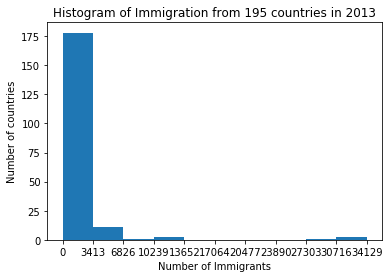

In [22]:
count, bin_edges = np.histogram(df_canada[2013])

df_canada[2013].plot(kind = "hist", xticks = bin_edges)

plt.title("Histogram of Immigration from 195 countries in 2013")
plt.ylabel("Number of countries")
plt.xlabel("Number of Immigrants")

plt.show()

# 5. Bar Charts

Compare values of a variable at a given point in time

In [23]:
years = list(map(int, range(1980, 2014)))

df_iceland = df_canada.loc["Iceland", years]

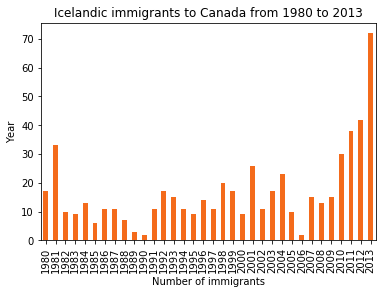

In [24]:
df_iceland.plot(kind = "bar", color = "#F46B1B")

plt.title("Icelandic immigrants to Canada from 1980 to 2013")
plt.ylabel("Year")
plt.xlabel("Number of immigrants")

plt.show()

# 6. Pie Chart

In [25]:
# Group data by continent
df_continents = df_canada.groupby("AreaName", axis = 0).sum()

In [26]:
df_continents.index.names = ['Continent']

df_continents.drop(['AREA', 'REG', 'DEV'], axis = 1, inplace=True)

df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


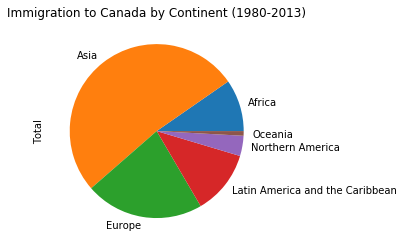

In [27]:
# Import matplotlib
df_continents['Total'].plot(kind = 'pie')

plt.title("Immigration to Canada by Continent (1980-2013)")

plt.show()

# 7. Box Plots
Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”)

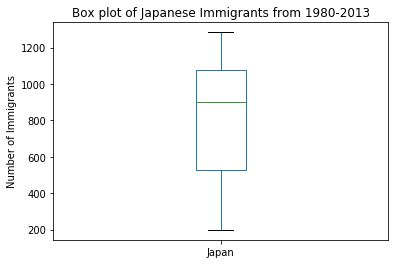

In [28]:
# Import matplotlib

# Columns become rows and vice versa
df_japan = df_canada.loc[['Japan'], years].transpose()

df_japan.plot(kind = 'box')

plt.title("Box plot of Japanese Immigrants from 1980-2013")
plt.ylabel("Number of Immigrants")

plt.show()

# 8. Scatter Plots
Scatter plots show how much one variable is affected by another. The relationship between two variables is called their correlation

In [29]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


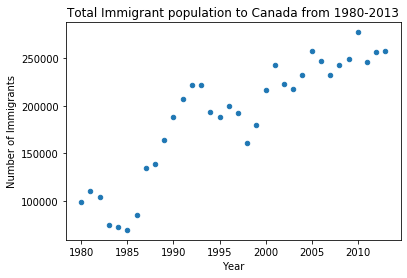

In [30]:
# Import matplotlib

df_tot.plot(kind = 'scatter', x = 'year', y = 'total')

plt.title("Total Immigrant population to Canada from 1980-2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

plt.show()

# 9. Waffle Charts
Display progress toward goals --> See "DV0101EN-Review-Waffle-Charts-Word-Clouds-and-Regression-Plots-py" file

# 10. Word Clouds
Depiction of the frequency of different words in some textual data --> See "DV0101EN-Review-Waffle-Charts-Word-Clouds-and-Regression-Plots-py" file

# 11. Regression Plots

In [31]:
import seaborn as sns

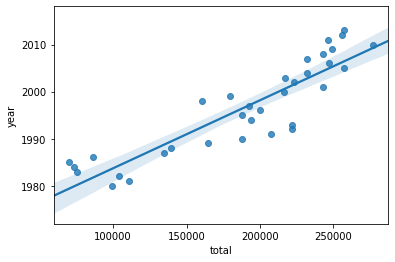

In [32]:
ax = sns.regplot(x = "total", y = "year", data = df_tot)

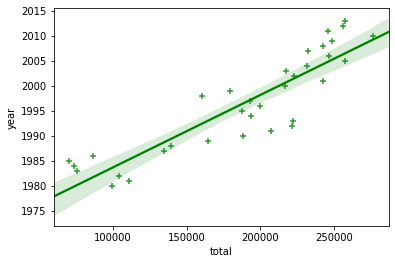

In [33]:
ax = sns.regplot(x = "total", y = "year", data = df_tot, color = "green", marker = '+')

# 12. Folium Library
- Creating maps of different regions of the world and how to superimpose markers on top of a map.
- Creating Choropleth maps with Folium.

In [34]:
import folium

In [35]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [36]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location = [56.130, -106.35], zoom_start = 4)

world_map

In [37]:
# Stamen Toner: good for exploring rivers and coastal zones
world_map = folium.Map(location = [56.130, -106.35], zoom_start = 4, tiles = 'Stamen Toner')

world_map

In [38]:
# Stamen Terrain: good for exploring hill shading and natural vegetation
world_map = folium.Map(location = [56.130, -106.35], zoom_start = 4, tiles = 'Stamen Terrain')

world_map

In [39]:
canada_map = folium.Map(location = [56.130, -106.35], zoom_start = 3)

## Add a red marker to Ontario

# Create a feature group
ontario = folium.map.FeatureGroup()

# Style the feature group
ontario.add_child(folium.CircleMarker([51.25, -85.32], radius = 5, color = "red", fill_color = "red"))

# Add the feature group to the map
canada_map.add_child(ontario)

# Label the marker
folium.Marker([51.25, -85.32], popup = "Ontario").add_to(canada_map)

# Display map
canada_map

In [40]:
df_can = pd.read_excel(
    "Canada.xlsx",
    sheet_name = "Canada by Citizenship",
    skiprows = range(20),
    skipfooter = 2)
# Skipping the first 20 rows because of the header in the Excel file

# Clean up the data set to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# Let us rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# For sake of consistency, let us also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# Add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


In [41]:
df_can

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,295,184,106,76,62,61,39,70,45,2113
6,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,...,24,32,15,32,38,27,37,51,25,981
7,Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,...,1153,847,620,540,467,459,278,263,282,19596
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
9,Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,...,909,875,1033,1018,1018,933,851,982,1121,23829


In [42]:
# Choropleth Maps: a Geojson file is needed

# Create a plain world map
world_map = folium.Map(zoom_start = 2, tiles = "Mapbox Bright")

# GeoJson file
world_geo = r'world-countries.json'

# Generate Choropleth Map using the total population of each country to Canada from 1980 to 2013
world_map.choropleth(geo_data = world_geo, data = df_can, columns = ['Country', 'Total'], key_on = 'feature.properties.name', fill_color = 'YlOrRd', legend_name = 'Immigration to Canada')

# Display map
world_map

/Users/davidtofan/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
